<a href="https://colab.research.google.com/github/vishalkharde/logistic_Regression/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('C:/Users/visha/OneDrive/Desktop/ML_Assignment/Default.csv')

In [ ]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [ ]:
df.isnull()

,Unnamed: 0,default,student,balance,income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9995,False,False,False,False,False
9996,False,False,False,False,False
9997,False,False,False,False,False
9998,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


default : (categorical: “no”, “yes”, “unknown”)

student : (categorical: “no”, “yes”, “unknown”)

balance :  numeric values

income :   numeric values

In [ ]:
data=df.iloc[:,1:]

In [ ]:
data

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


In [ ]:
data.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


In [ ]:
student_balance=[0]*len(df['student'])
for i in range (0,len(df['student'])):
    if df["student"][i]=='Yes':
        student_balance[i]=data['balance'][i]
    else:
        student_balance[i]=0
student_balance1=list(filter(lambda num: num != 0, student_balance))

In [ ]:
#student_balance

In [ ]:
No_student_balance=[0]*len(df['student'])
for i in range (0,len(df['student'])):
    if df["student"][i]=='No':
        No_student_balance[i]=data['balance'][i]
    else:
        No_student_balance[i]=0
No_student_balance1=list(filter(lambda num: num != 0, No_student_balance))

Text(0, 0.5, 'credit_card_balance')

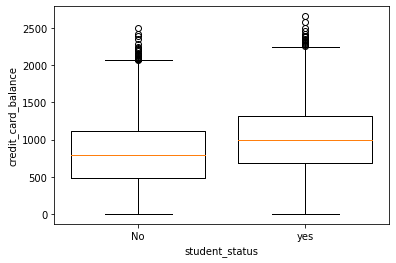

In [ ]:
plt.boxplot([No_student_balance1,student_balance1],labels=('No','yes'),widths=0.8)
plt.xlabel('student_status')
plt.ylabel('credit_card_balance')

In [ ]:
df['default'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Defualt_Binary_col=[0]*len(df['default'])
for i in range (0,len(df['default'])):
    if df['default'][i]=='Yes':
        Defualt_Binary_col[i]=1
    else:
        Defualt_Binary_col[i]=0
#Defualt_Binary_col        
        

In [ ]:
print('Number_of_Ones_in_binary_col==',Defualt_Binary_col.count(1))
print('Number_of_Zeroes_in_binary_col==',Defualt_Binary_col.count(0))

Number_of_Ones_in_binary_col== 333
Number_of_Zeroes_in_binary_col== 9667


In [ ]:
response_variable=Defualt_Binary_col
y=response_variable

<AxesSubplot:ylabel='count'>

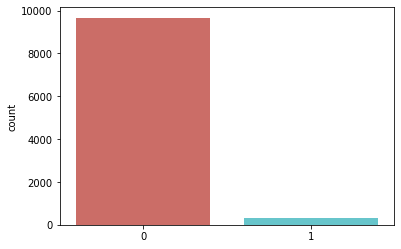

In [ ]:
sns.countplot(x=y,data=df,palette='hls')

# percentage of No subscription

In [ ]:
count_no_sub = Defualt_Binary_col.count(0)
count_sub = Defualt_Binary_col.count(1)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 96.67
percentage of subscription 3.3300000000000005


# Test Train Split

In [ ]:
#x=(np.array(df['balance'])).reshape(-1,1)
income = pd.get_dummies(data['income'],drop_first=True)
balance = pd.get_dummies(data['balance'],drop_first=True)
data.drop(['default','student'],axis=1,inplace=True)
df = pd.concat([income,balance,data],axis=1) 
x=df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.30, random_state=101)
                                   

# Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# Evaluation
We can check precision, recall,f1-score using classification report

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.88      0.30      0.44        94

    accuracy                           0.98      3000
   macro avg       0.93      0.65      0.72      3000
weighted avg       0.97      0.98      0.97      3000



In [ ]:
confusion_matrix(y_test,predictions)
result2 = accuracy_score(y_test,predictions)
print("Accuracy:",result2)

Accuracy: 0.9766666666666667
